In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (9, 5)

In [3]:
sns.set()

In [4]:
df_learning_curves = pd.read_csv('updnet_learning_curves.csv')

<IPython.core.display.Javascript object>


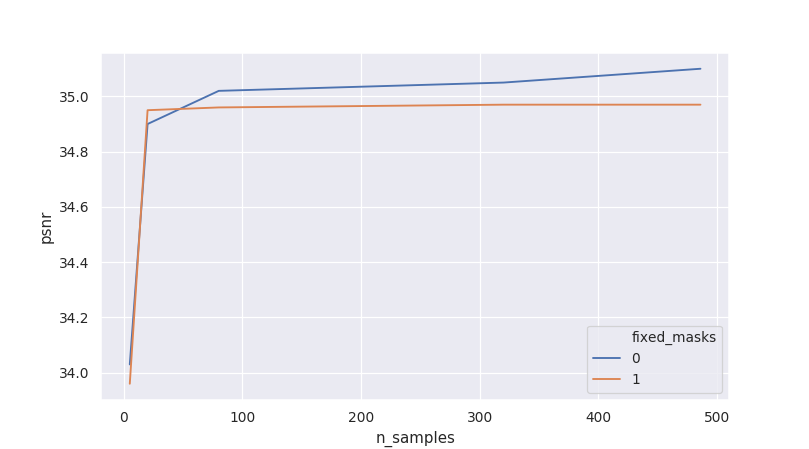

In [5]:
plt.figure()
sns.lineplot(data=df_learning_curves, x='n_samples', y='psnr', hue='fixed_masks')
plt.savefig('updnet_learning_curves.png')

In [6]:
df_n_params = pd.read_csv('n_params_model.csv')
df_denoising_res = pd.read_csv('denoising_results_None.csv')

In [7]:
df_denoisers = df_denoising_res.merge(df_n_params)

In [8]:
df_denoisers['model_denomination'] = df_denoisers[['model_name', 'model_size']].agg('-'.join, axis=1)

<IPython.core.display.Javascript object>


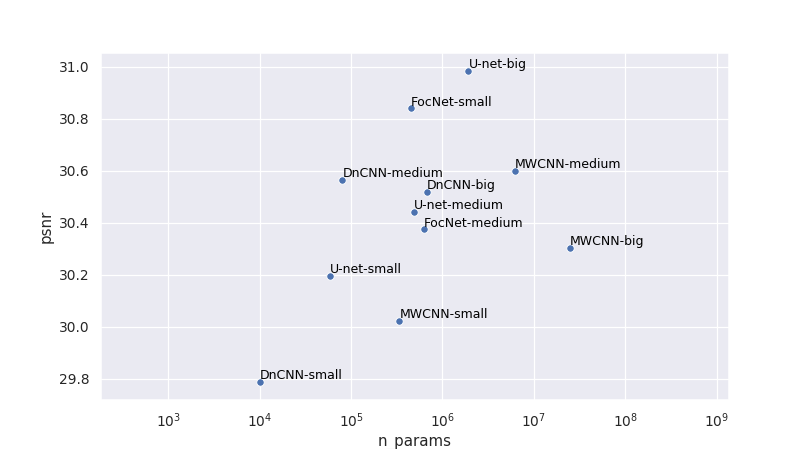

In [21]:
plt.figure()
plt.xscale('log')
p = sns.scatterplot(x='n_params', y='psnr', data=df_denoisers)
for line in range(0, df_denoisers.shape[0]):
    p.text(
        df_denoisers.n_params[line], 
        df_denoisers.psnr[line]+0.01, 
        df_denoisers.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )